## import các thư viện cần thiết và lấy data từ drive 

In [ ]:
import os 
import cv2
import glob
from google.colab.patches import cv2_imshow
import numpy as np
from numpy import array 
import matplotlib.pyplot as plt
import pandas as pd
from skimage import io

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


## tiền xử lý hình ảnh 

loại bỏ nền, tách vật thể ra khỏi nền

In [ ]:
def clustering_image(img):
  #img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
  vectorized = img.reshape((-1,3))
  vectorized = np.float32(vectorized)
  criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
  K = 2
  attempts=10
  ret,label,center=cv2.kmeans(vectorized,K,None,criteria,attempts,cv2.KMEANS_PP_CENTERS)
  center = np.uint8(center)
  res = center[label.flatten()]
  result_image = res.reshape((img.shape))
  return result_image, center

In [ ]:
def remove_light_color(img, center_color):
  light_color = max(sum(center_color[0]), sum(center_color[1]))
  for x in range(img.shape[0]):
    for y in range(img.shape[1]):
      if sum(img[x][y]) == light_color:
        img[x][y][0]=0
        img[x][y][1]=0
        img[x][y][2]=0
  return img

detect canny edge

cachua


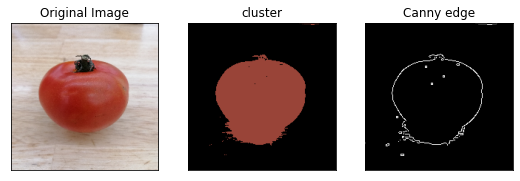

cam


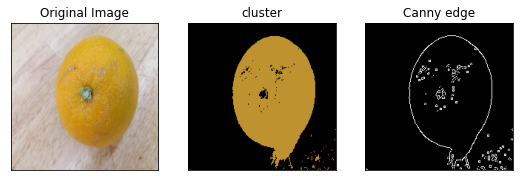

chuoi


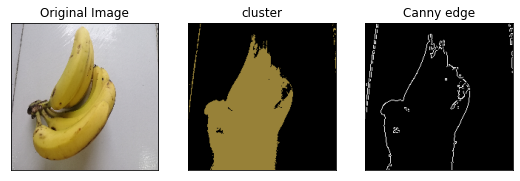

duahau


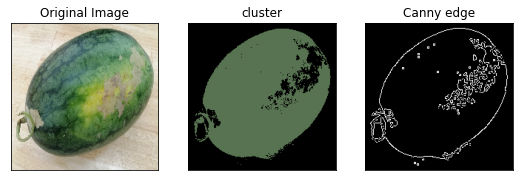

le


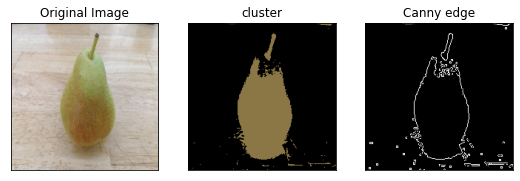

nho


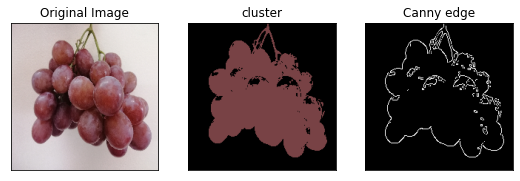

quyt


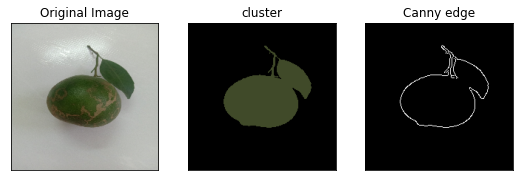

tao


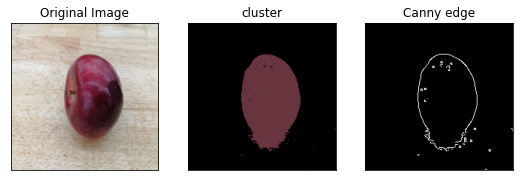

thom


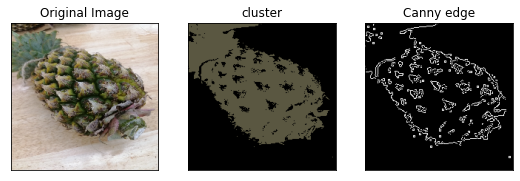

xoai


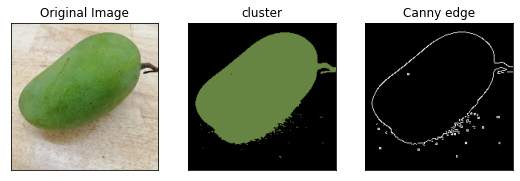

In [ ]:
def Canny_Detect(img):
    edge = cv2.Canny (img, 70, 50)
    return edge


# một vài ví dụ về ảnh khi được xử lý
f_name = ['cachua', 'cam', 'chuoi', 'duahau', 'le', 'nho', 'quyt', 'tao', 'thom', 'xoai']
for name in f_name:
    img = cv2.imread ("/content/drive/My Drive/Fruit recognition/data/"+ name + "/" + name + "_1.jpg")
    print (name)
    resized = cv2.resize(img, (200, 200))
    resized = cv2.cvtColor(resized, cv2.COLOR_BGR2RGB)

    image, center = clustering_image(resized )
    image = remove_light_color(image, center)

    edge = Canny_Detect(image)

    figure_size = 9
    plt.figure(figsize=(figure_size,figure_size))

    plt.subplot(1,3,1)
    plt.imshow(resized)
    plt.title('Original Image'), plt.xticks([]), plt.yticks([])

    plt.subplot(1,3,2)
    plt.imshow(image)
    plt.title('cluster'), plt.xticks([]), plt.yticks([])

    plt.subplot(1,3,3)
    plt.imshow(edge, cmap='gray')
    plt.title('Canny edge'), plt.xticks([]), plt.yticks([])

    plt.show()

##tạo 2 tập train và valid 

In [ ]:
path = '/content/drive/My Drive/Fruit recognition/data'
name_fruits = ['cachua', 'cam', 'chuoi', 'duahau', 'le', 'nho', 'quyt', 'tao', 'thom', 'xoai']
dataset_train = {}
dataset_test = {}
test_size = 0.25
number = 1
dim = (200, 200)

for name in name_fruits:
  index = 0
  images_train = []
  images_test = []
  while index < 250:
    img_path = path+'/'+name+'/'+name+'_'+str(index)+'.jpg'
    
    #print(img_path)
    fruit_img = cv2.imread(img_path)
    fruit_img = cv2.resize(fruit_img, dim)
    fruit_img = cv2.cvtColor(fruit_img,cv2.COLOR_BGR2RGB)

    cluster, center = clustering_image(fruit_img )
    image = remove_light_color(cluster, center)
    
    edge = Canny_Detect(image)

    if len(images_test) < test_size*(len(os.listdir(path+'/'+name))):
      images_test.append(edge)
    else:
      images_train.append(edge)
    if index == 249:
      print('done {} image'.format(index + 1))
      figure_size = 6
      plt.figure(figsize=(figure_size,figure_size))
      plt.subplot(1,2,1),plt.imshow(fruit_img)
      plt.title('Anh Goc'), plt.xticks([]), plt.yticks([])
      plt.subplot(1,2,2),plt.imshow(edge)
      plt.title(name), plt.xticks([]), plt.yticks([])
    
      plt.show()
    index+=1
  dataset_train[name] = images_train
  dataset_test[name] = images_test

KeyboardInterrupt: ignored

## tạo dataframe 

In [ ]:
def features_section(img):
    features = np.array([], dtype='uint8')
    section = 1
    
    for y in range(0, img.shape[0], 40):
        for x in range(0, img.shape[1], 40):
            
            # crop ảnh về các section 40 * 40
            section_img = img[y:y+40, x:x+40]
            
            # tính trung bình và độ lệch chuẩn của pixels trong từng section 
            section_mean = np.mean(section_img)
            section_std = np.std(section_img)
            
            # tạo features array
            features = np.append(features, [section_mean, section_std])
    
    return features

tạo array gồm các giá trị của features

In [ ]:
all_imgs = np.zeros((1, 50), dtype='uint8')

progress_counter = 0
name = []
section_mean = []
section_std = []
for fruits in dataset_train: 
    for img in dataset_train[fruits]:


        img_features = features_grid(img)
        img_features = img_features.reshape(1, img_features.shape[0])

        all_imgs = np.append(all_imgs, img_features, axis=0)
        progress_counter += 1
        name.append (fruits)

all_imgs = all_imgs[1:]

In [ ]:
feature_name = []
section = 1
for y in range(0, 200, 40):
    for x in range(0, 200, 40):
        feature_name.append(f"sec{section}_mean")
        feature_name.append(f"sec{section}_std")
        section += 1

tạo train dataframe

In [ ]:
ftb_train = pd.DataFrame(all_imgs, columns= feature_name)
print (ftb_train.shape)
name_col = name
ftb_train.insert(loc = 0, column = "name", value= name_col)
ftb_train.head(200)

(1870, 50)


,name,sec1_mean,sec1_std,sec2_mean,sec2_std,sec3_mean,sec3_std,sec4_mean,sec4_std,sec5_mean,sec5_std,sec6_mean,sec6_std,sec7_mean,sec7_std,sec8_mean,sec8_std,sec9_mean,sec9_std,sec10_mean,sec10_std,sec11_mean,sec11_std,sec12_mean,sec12_std,sec13_mean,sec13_std,sec14_mean,sec14_std,sec15_mean,sec15_std,sec16_mean,sec16_std,sec17_mean,sec17_std,sec18_mean,sec18_std,sec19_mean,sec19_std,sec20_mean,sec20_std,sec21_mean,sec21_std,sec22_mean,sec22_std,sec23_mean,sec23_std,sec24_mean,sec24_std,sec25_mean,sec25_std
0,cachua,0.0,0.0,0.000000,0.000000,7.650000,43.499741,0.000000,0.000000,0.0,0.0,0.000000,0.000000,5.418750,36.775242,24.543750,75.208115,10.359375,50.342070,0.000000,0.000000,0.000000,0.000000,6.375000,39.811862,0.000000,0.000000,6.375000,39.811862,0.000000,0.000000,0.000000,0.000000,9.881250,49.214628,0.000000,0.000000,10.837500,51.440364,0.000000,0.000000,0.000000,0.000000,2.390625,24.574261,10.518750,50.711312,4.462500,33.436860,0.000000,0.000000
1,cachua,0.0,0.0,0.956250,15.586191,11.634375,53.210966,3.346875,29.021570,0.0,0.0,2.709375,26.144787,8.287500,45.217583,14.821875,59.664815,14.025000,58.134967,3.665625,30.352884,16.893750,63.423241,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.375000,39.811862,0.000000,0.000000,9.881250,49.214628,3.346875,29.021570,9.243750,47.662452,2.550000,25.372180,5.578125,37.300220,32.034375,84.513694,47.812500,99.529656,4.303125,32.844786,0.000000,0.000000
2,cachua,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,6.534375,40.293518,11.475000,52.862552,4.940625,35.148963,0.000000,0.000000,0.000000,0.000000,6.375000,39.811862,0.000000,0.000000,6.375000,39.811862,0.000000,0.000000,0.000000,0.000000,6.056250,38.828670,7.650000,43.499741,10.996875,51.800308,6.375000,39.811862,0.000000,0.000000,1.275000,17.986088,7.331250,42.611284,0.478125,11.031467,0.000000,0.000000
3,cachua,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.968750,44.368122,0.000000,0.000000,8.287500,45.217583,6.375000,39.811862,6.375000,39.811862,2.231250,23.748479,3.984375,31.624996,7.809375,43.936366,0.000000,0.000000,8.128125,44.795150,0.000000,0.000000,9.403125,48.055989,9.243750,47.662452,10.996875,51.800308,5.737500,37.817239,0.000000,0.000000
4,cachua,0.0,0.0,0.000000,0.000000,7.650000,43.499741,4.303125,32.844786,0.0,0.0,0.000000,0.000000,4.303125,32.844786,14.025000,58.134967,15.618750,61.146021,0.637500,12.734053,0.000000,0.000000,6.375000,39.811862,0.000000,0.000000,0.796875,14.232643,6.375000,39.811862,0.000000,0.000000,4.143750,32.241054,3.346875,29.021570,7.650000,43.499741,0.796875,14.232643,0.000000,0.000000,0.000000,0.000000,12.590625,55.245683,8.446875,45.635550,2.550000,25.372180
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,cam,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,6.534375,40.293518,18.646875,66.387101,10.518750,50.711312,0.000000,0.000000,0.000000,0.000000,7.968750,44.368122,3.187500,28.331120,1.912500,22.000678,12.271875,54.577735,1.593750,20.096423,10.837500,51.440364,10.040625,49.593802,10.040625,49.593802,3.187500,28.331120,0.000000,0.000000,4.781250,34.588414,25.021875,75.858315,6.693750,40.768860,0.000000,0.000000
196,cam,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,7.490625,43.058099,7.809375,43.936366,5.737500,37.817239,0.000000,0.000000,4.940625,35.148963,4.462500,33.436860,0.000000,0.000000,8.446875,45.635550,0.000000,0.000000,2.868750,26.894266,9.562500,48.445806,8.925000,46.863839,10.518750,50.711312,0.000000,0.000000,0.000000,0.000000,5.737500,37.817239,23.746875,74.104919,2.390625,24.574261,0.000000,0.000000
197,cam,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000

In [ ]:
ftb_train.to_csv("/content/drive/My Drive/Fruit recognition/output_input/25_edge+cluster_train_features.csv", index = False)

tạo valid dataframe và lưu lại

In [ ]:
all_imgs = np.zeros((1, 50), dtype='uint8')

progress_counter = 0
name_test = []
section_mean = []
section_std = []
for fruits in dataset_test: 
    for img in dataset_test[fruits]:


        img_features = features_grid(img)
        img_features = img_features.reshape(1, img_features.shape[0])

        all_imgs = np.append(all_imgs, img_features, axis=0)
        progress_counter += 1
        name_test.append (fruits)

all_imgs = all_imgs[1:]

In [ ]:
ftb_test = pd.DataFrame(all_imgs, columns= feature_name)
print (ftb_test.shape)
name_col = name_test
ftb_test.insert(loc = 0, column = "name", value= name_col)
ftb_test.head(200)

(630, 50)


,name,sec1_mean,sec1_std,sec2_mean,sec2_std,sec3_mean,sec3_std,sec4_mean,sec4_std,sec5_mean,sec5_std,sec6_mean,sec6_std,sec7_mean,sec7_std,sec8_mean,sec8_std,sec9_mean,sec9_std,sec10_mean,sec10_std,sec11_mean,sec11_std,sec12_mean,sec12_std,sec13_mean,sec13_std,sec14_mean,sec14_std,sec15_mean,sec15_std,sec16_mean,sec16_std,sec17_mean,sec17_std,sec18_mean,sec18_std,sec19_mean,sec19_std,sec20_mean,sec20_std,sec21_mean,sec21_std,sec22_mean,sec22_std,sec23_mean,sec23_std,sec24_mean,sec24_std,sec25_mean,sec25_std
0,cachua,0.000000,0.000000,0.000000,0.000000,7.650000,43.499741,1.275000,17.986088,0.000000,0.000000,2.709375,26.144787,11.475000,52.862552,14.821875,59.664815,6.056250,38.828670,0.000000,0.000000,15.300000,60.559145,6.056250,38.828670,10.678125,51.077388,3.346875,29.021570,6.056250,38.828670,14.025000,58.134967,6.534375,40.293518,0.000000,0.000000,8.128125,44.795150,3.665625,30.352884,0.637500,12.734053,10.040625,49.593802,16.893750,63.423241,7.650000,43.499741,0.000000,0.000000
1,cachua,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.231250,23.748479,3.346875,29.021570,0.000000,0.000000,8.446875,45.635550,16.256250,62.298299,10.359375,50.342070,0.000000,0.000000,4.621875,34.017883,2.071875,22.891821,1.275000,17.986088,6.375000,39.811862,0.000000,0.000000,0.000000,0.000000,21.515625,70.877093,0.159375,6.373008,15.140625,60.262931,0.000000,0.000000,3.028125,27.622497,6.693750,40.768860,7.012500,41.701467,0.000000,0.000000,0.000000,0.000000
2,cachua,0.000000,0.000000,0.000000,0.000000,5.259375,36.241959,0.000000,0.000000,0.000000,0.000000,3.984375,31.624996,17.212500,63.975912,9.881250,49.214628,8.287500,45.217583,1.275000,17.986088,7.331250,42.611284,0.000000,0.000000,1.275000,17.986088,0.000000,0.000000,6.693750,40.768860,11.315625,52.511342,0.796875,14.232643,0.000000,0.000000,9.881250,49.214628,1.434375,19.071135,0.000000,0.000000,8.606250,46.049172,14.981250,59.964831,12.112500,54.239975,1.275000,17.986088
3,cachua,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.578125,37.300220,9.084375,47.265101,7.331250,42.611284,0.000000,0.000000,0.000000,0.000000,6.375000,39.811862,1.275000,17.986088,7.809375,43.936366,0.000000,0.000000,1.275000,17.986088,4.940625,35.148963,5.418750,36.775242,33.628125,86.280479,1.275000,17.986088,25.659375,76.712040,0.796875,14.232643,6.375000,39.811862,24.543750,75.208115,30.759375,83.051198
4,cachua,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.665625,30.352884,17.212500,63.975912,10.200000,49.969591,0.000000,0.000000,0.000000,0.000000,6.375000,39.811862,0.000000,0.000000,6.375000,39.811862,0.000000,0.000000,0.000000,0.000000,15.618750,61.146021,5.737500,37.817239,7.012500,41.701467,0.000000,0.000000,0.000000,0.000000,1.593750,20.096423,5.259375,36.241959,1.593750,20.096423,0.796875,14.232643
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,duahau,16.893750,63.423241,7.012500,41.701467,7.490625,43.058099,37.771875,90.582082,26.456250,77.758669,2.709375,26.144787,10.837500,51.440364,3.665625,30.352884,10.996875,51.800308,22.471875,72.286534,8.925000,46.863839,0.000000,0.000000,0.000000,0.000000,9.562500,48.445806,6.375000,39.811862,8.287500,45.217583,0.000000,0.000000,5.259375,36.241959,7.650000,43.499741,0.000000,0.000000,15.459375,60.853499,12.271875,54.577735,2.550000,25.372180,0.000000,0.000000,0.000000,0.000000
196,duahau,26.615625,77.965331,0.796875,14.232643,12.431250,54.912956,7.650000,43.499741,6.056250,38.828670,0.000000,0.000000,24.065625,74.549179,15.459375,60.853499,1.275000,17.986088,6.853125,41.238108,31.078125,83.421053,13.387500,56.873433,34.106250,86.797796,3.506250,29.695117,5.259375,36.241959,19.284375,67.421276,1.275000,17.986088,4.781250,34.588414,14.662500,59.362855,0.000000,0.00000

In [ ]:
ftb_test.to_csv("/content/drive/My Drive/Fruit recognition/output_input/25_edge+cluster_valid_features.csv", index = False)